In [27]:
# Install
# pip install kagglehub

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
local_path = kagglehub.dataset_download(
    "vivek468/superstore-dataset-final"
)

print("Dataset downloaded to:", local_path)

# Build full file path
file_path = local_path + "/Sample - Superstore.csv"

# Read using correct encoding
df = pd.read_csv(file_path, encoding="latin1")

print("Dataset loaded successfully!")


Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Dataset downloaded to: /kaggle/input/superstore-dataset-final
Dataset loaded successfully!


In [10]:
print("----------DATASET OVERVIEW----------")
print("="*40)
print(f"Shape of the dataset: {df.shape}")
print("Sample data of the dataset: ")
print(df.sample)
print("Information about the dataset: ")
print(df.info())
print(f"\nTotal unique customers: {df['Customer ID'].nunique()}")
print(f"Time span of the data: {df['Order Date'].min()} to {df['Order Date'].max()}")


----------DATASET OVERVIEW----------
Shape of the dataset: (9994, 21)
Sample data of the dataset: 
<bound method NDFrame.sample of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

    

In [24]:
print("----Data Cleaning-----------")
print("="*40)
#Checking if there are duplicated rows in the dataset
print(f"\nDuplicate Rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
#Checking null values in the dataset
print(f"Null Values in the dataset:\n{df.isnull().sum()}")   #No need to fill values through median because there are no null values
#Two coloumns contains date n time, convertng them in datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
#Converting the psotal code and quantity to int
df["Postal Code"] = df["Postal Code"].astype("Int64")
df["Quantity"] = df["Quantity"].astype("Int64")
#Converting Discount and Profit to float
df["Discount"] = df["Discount"].astype("float64")
df["Profit"] = df["Profit"].astype("float64")

----Data Cleaning-----------

Duplicate Rows: 0
Null Values in the dataset:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [26]:
print("\n===== STATISTICAL SUMMARY =====")
print(df.describe())


===== STATISTICAL SUMMARY =====
            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales  Quantity  \
count                           9994        9994.0   9994.000000    9994.0   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001  3.789574   
min              2014-01-07 00:00:00        1040.0      0.444000       1.0   
25%              2015-05-27 00:00:00       23223.0     17.280000       2.0   
50%              2016-06-29 00:00:00       56430.5     54.490000       3.0   
75%              2017

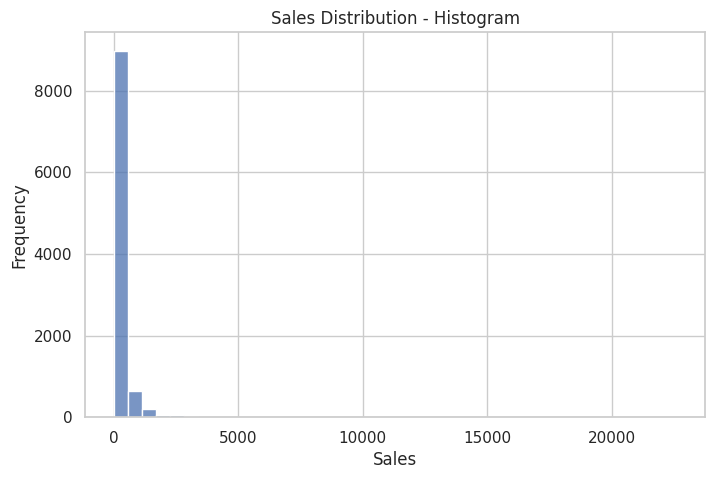

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=40)
plt.title("Sales Distribution - Histogram")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

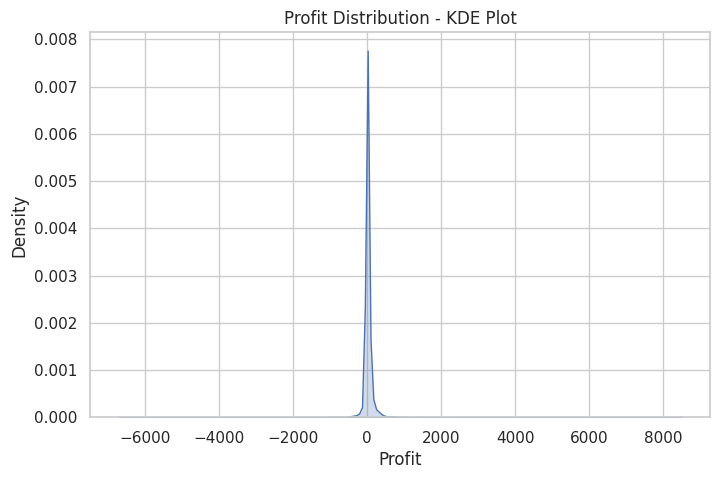

In [41]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Profit"], fill=True)
plt.title("Profit Distribution - KDE Plot")
plt.xlabel("Profit")
plt.show()

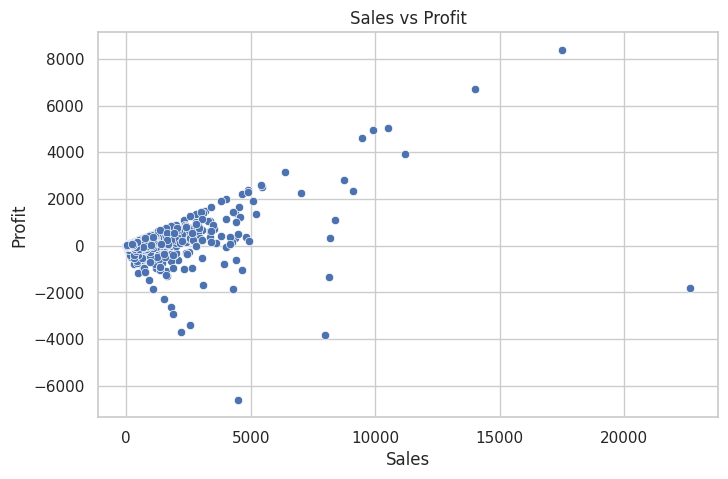

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


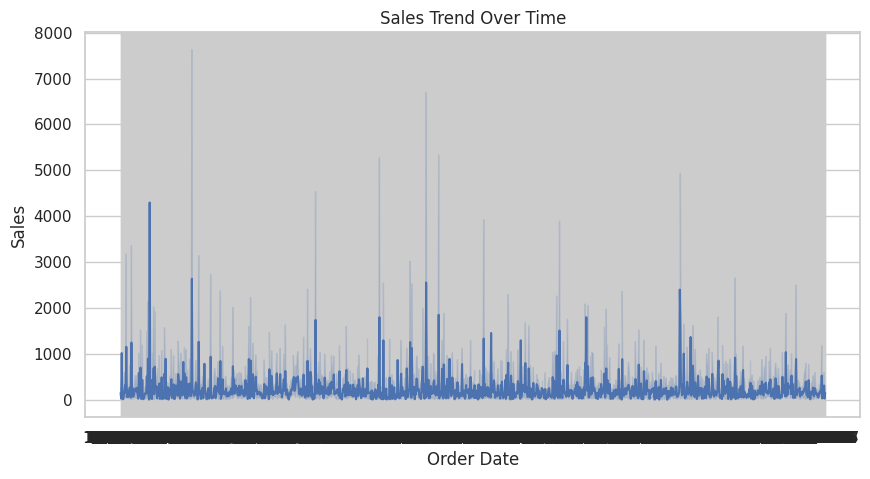

In [43]:
df_sorted = df.sort_values("Order Date")

plt.figure(figsize=(10,5))
sns.lineplot(x="Order Date", y="Sales", data=df_sorted)
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

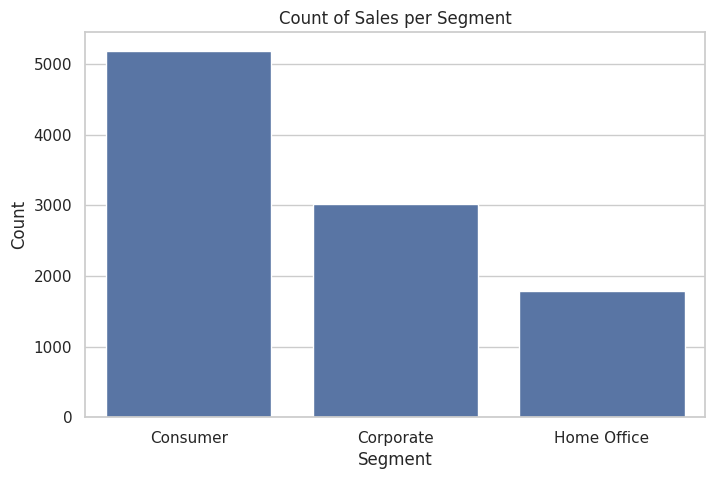

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x="Segment", data=df)
plt.title("Count of Sales per Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

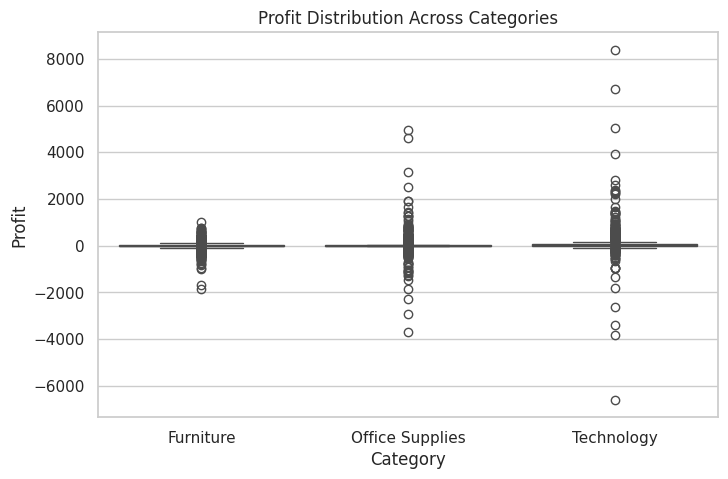

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Profit", data=df)
plt.title("Profit Distribution Across Categories")
plt.show()

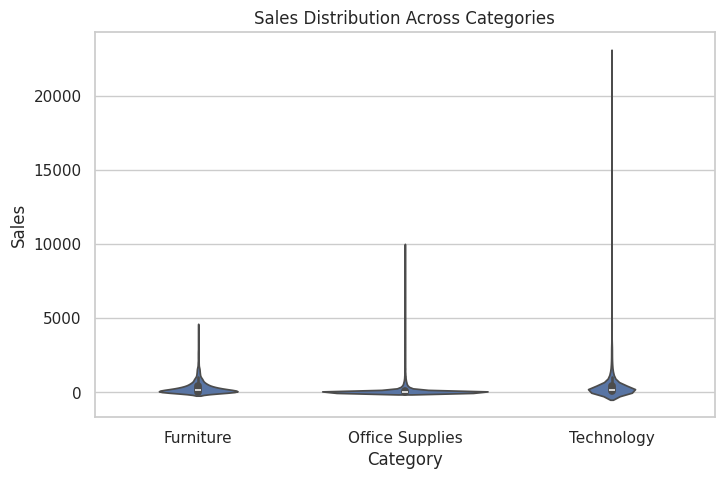

In [46]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Category", y="Sales", data=df)
plt.title("Sales Distribution Across Categories")
plt.show()

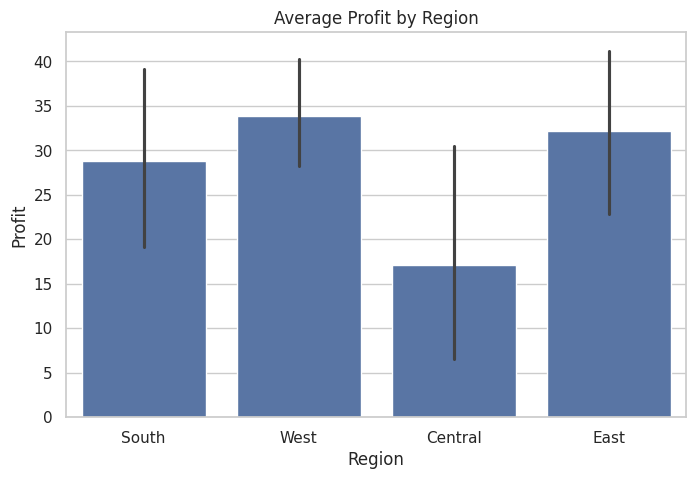

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Profit", data=df)
plt.title("Average Profit by Region")
plt.show()

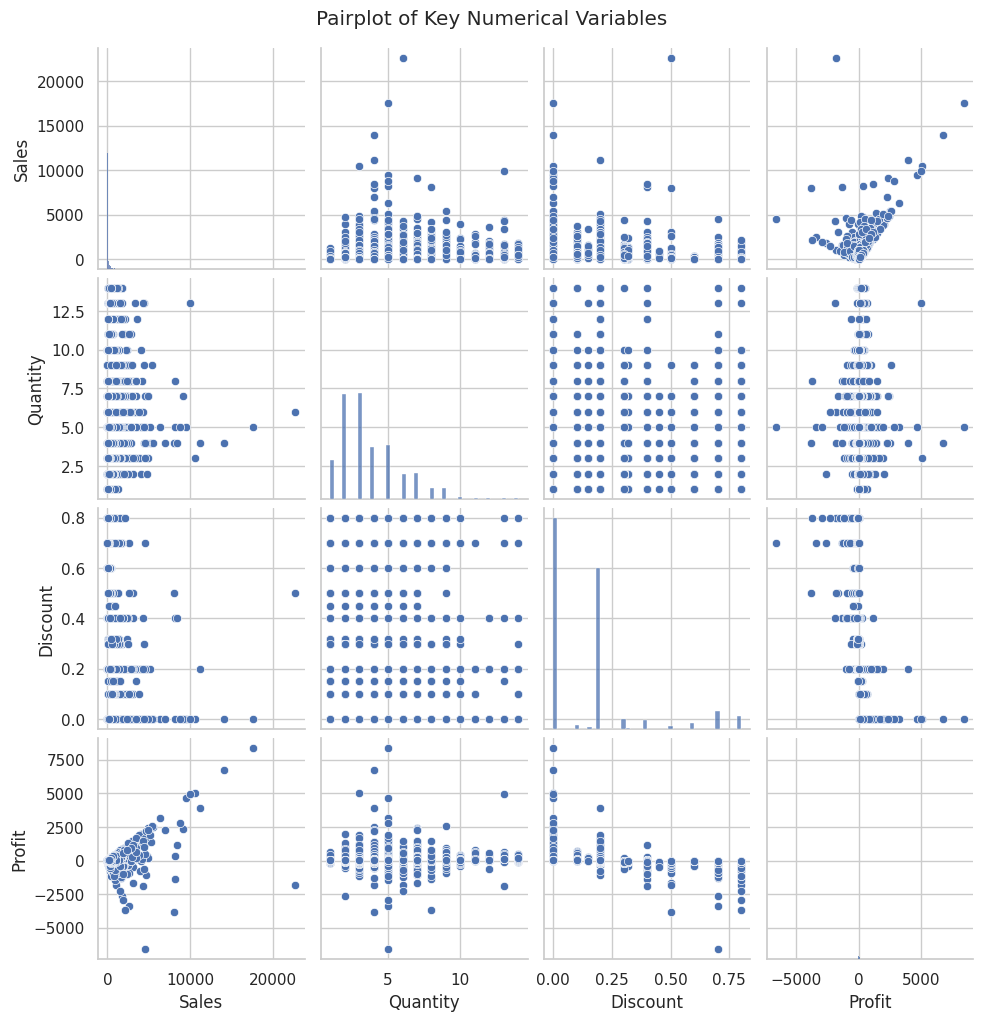

In [48]:
sns.pairplot(df[["Sales", "Quantity", "Discount", "Profit"]])
plt.suptitle("Pairplot of Key Numerical Variables", y=1.02)
plt.show()

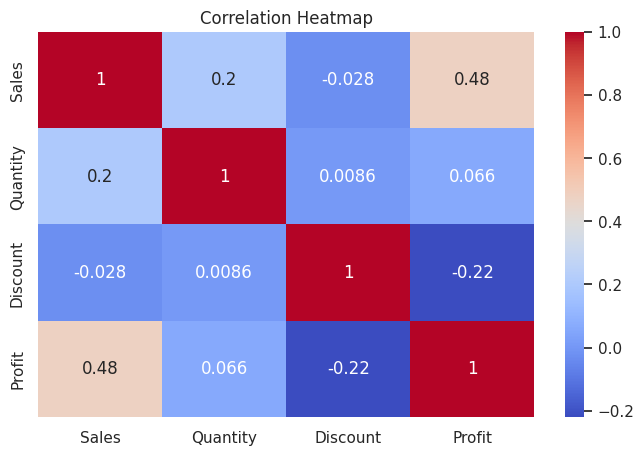

In [49]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["Sales", "Quantity", "Discount", "Profit"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

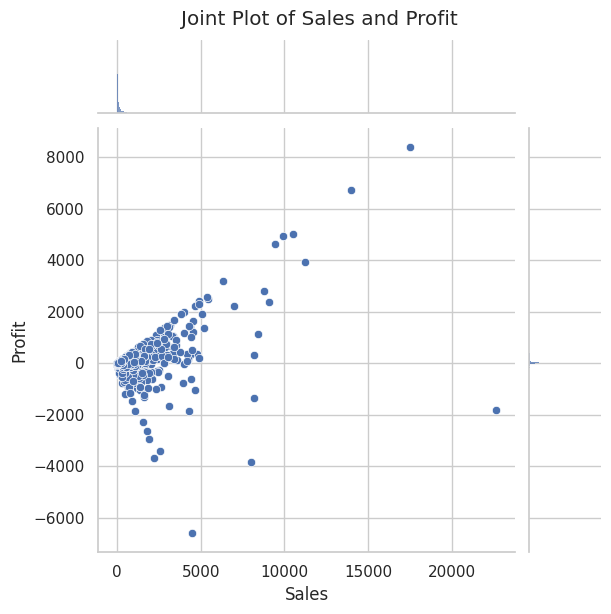

In [50]:
sns.jointplot(x="Sales", y="Profit", data=df, kind="scatter")
plt.suptitle("Joint Plot of Sales and Profit", y=1.02)
plt.show()

In [53]:
print("""
===== FINAL INSIGHTS =====

1. Sales show a right-skewed pattern, with most transactions being low-value and a small number of high-value orders.
2. Profit includes many negative values, indicating that certain products or discounts lead to losses.
3. Higher discounts tend to reduce profit, showing a clear negative correlation.
4. Technology generates the highest total sales, while Furniture shows unstable profitability.
5. Binders, Papers, Phones, and Chairs rank among the most frequently purchased items.
6. The Consumer segment contributes the most revenue, followed by the Corporate segment.
7. Sales are strongest in the West and East regions.
8. States such as California and New York are highly profitable, while others consistently produce losses.
9. Analysis suggests lowering excessive discounts and improving Furniture category margins to enhance overall profitability.
""")



===== FINAL INSIGHTS =====

1. Sales show a right-skewed pattern, with most transactions being low-value and a small number of high-value orders.
2. Profit includes many negative values, indicating that certain products or discounts lead to losses.
3. Higher discounts tend to reduce profit, showing a clear negative correlation.
4. Technology generates the highest total sales, while Furniture shows unstable profitability.
5. Binders, Papers, Phones, and Chairs rank among the most frequently purchased items.
6. The Consumer segment contributes the most revenue, followed by the Corporate segment.
7. Sales are strongest in the West and East regions.
8. States such as California and New York are highly profitable, while others consistently produce losses.
9. Analysis suggests lowering excessive discounts and improving Furniture category margins to enhance overall profitability.

